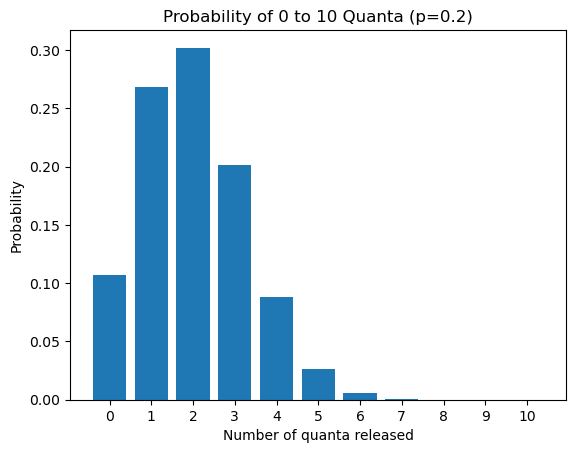

Probabilities for 0 to 10 quanta:
0 quanta: 0.1074
1 quanta: 0.2684
2 quanta: 0.3020
3 quanta: 0.2013
4 quanta: 0.0881
5 quanta: 0.0264
6 quanta: 0.0055
7 quanta: 0.0008
8 quanta: 0.0001
9 quanta: 0.0000
10 quanta: 0.0000
Likelihoods for 8 Quanta Released:
p = 0.1: 0.000016
p = 0.2: 0.002015
p = 0.3: 0.023180
p = 0.4: 0.091821
p = 0.5: 0.183289
p = 0.6: 0.206598
p = 0.7: 0.126202
p = 0.8: 0.032244
p = 0.9: 0.001293
p = 1.0: 0.000000


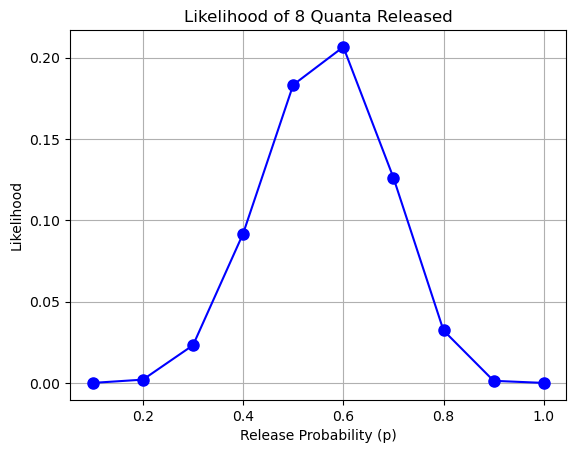

Most probable release probability: 0.6
Likelihood for p=0.1: 0.000000
Log-Likelihood for p=0.1: -15.904745

Likelihoods and Log-Likelihoods:
p=0.1: Likelihood=0.000000, Log-Likelihood=-15.904745
p=0.2: Likelihood=0.000173, Log-Likelihood=-8.660577
p=0.3: Likelihood=0.004551, Log-Likelihood=-5.392502
p=0.4: Likelihood=0.018970, Log-Likelihood=-3.964895
p=0.5: Likelihood=0.022396, Log-Likelihood=-3.798852
p=0.6: Likelihood=0.008431, Log-Likelihood=-4.775825
p=0.7: Likelihood=0.000836, Log-Likelihood=-7.087097
p=0.8: Likelihood=0.000011, Log-Likelihood=-11.433166
p=0.9: Likelihood=0.000000, Log-Likelihood=-20.299194
p=1.0: Likelihood=0.000000, Log-Likelihood=-inf


/var/folders/wn/d46pfxwx2yn9dfy8wr59wtb40000gp/T/ipykernel_6297/1945556295.py:74: RuntimeWarning: divide by zero encountered in log
  log_likelihoods = np.log(likelihoods)


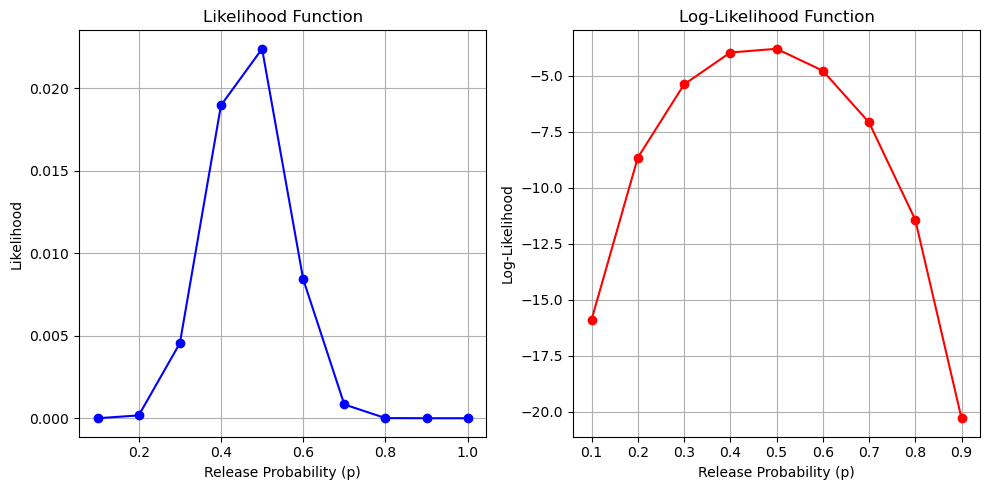


Max Likelihood: 0.022396 (p=0.5)
Max Log-Likelihood: -3.798852
Most likely value of p (p-hat): 0.41
Maximum likelihood value: 0.000000


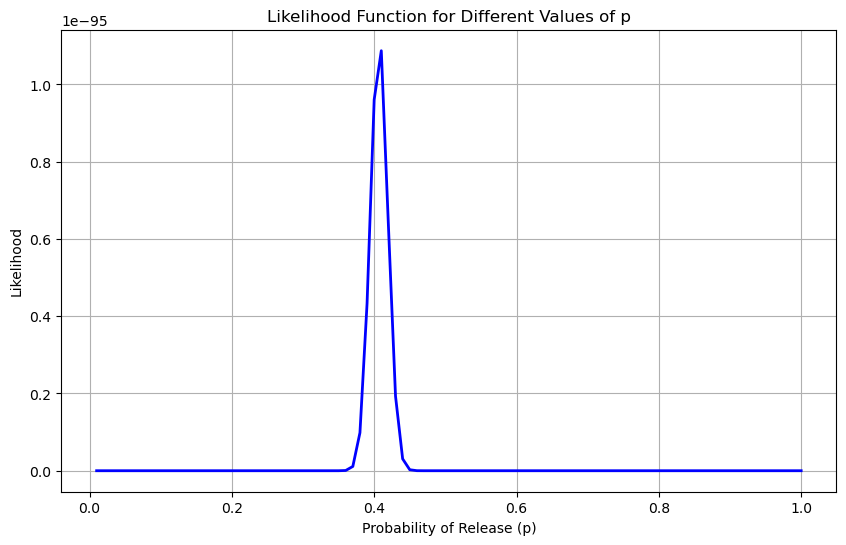

Probability of observing 7 quanta with p = 0.3: 0.0618


In [1]:
#load libraries
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

#Exercise1
# Parameters
n = 10  # Number of quanta
p = 0.2  # Probability of release for each quantum

# Calculate the binomial probabilities for all possible outcomes (0 to 10 quanta)
outcomes = np.arange(0, n+1)
probabilities = binom.pmf(outcomes, n, p)

# Plot the probability mass function
plt.bar(outcomes, probabilities)
plt.title(f'Probability of 0 to {n} Quanta (p={p})')
plt.xlabel('Number of quanta released')
plt.ylabel('Probability')
plt.xticks(outcomes)
plt.show()

# Print out the probabilities
print("Probabilities for 0 to 10 quanta:")
for k, prob in zip(outcomes, probabilities):
    print(f"{k} quanta: {prob:.4f}")

#Exercise 2
# Parameters
n = 14  # Total quanta available
observed_k = 8  # Quanta released in the experiment
release_probs = np.arange(0.1, 1.1, 0.1)  # Release probabilities from 0.1 to 1.0

# Compute the likelihood for each release probability
likelihoods = binom.pmf(observed_k, n, release_probs)

# Print the likelihoods for each probability
print(f"Likelihoods for {observed_k} Quanta Released:")
for p, likelihood in zip(release_probs, likelihoods):
    print(f"p = {p:.1f}: {likelihood:.6f}")

# Plot the likelihood function
plt.plot(release_probs, likelihoods, 'o-', color='b', markersize=8)
plt.title(f'Likelihood of {observed_k} Quanta Released')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.grid(True)
plt.show()

# Find the release probability with the highest likelihood (maximum likelihood estimate)
max_likelihood_prob = release_probs[np.argmax(likelihoods)]
print(f"Most probable release probability: {max_likelihood_prob:.1f}")

#Exercise3
# Parameters
n = 14  # Total quanta available
observed_1 = 8  # Quanta released in the first measurement
observed_2 = 5  # Quanta released in the second measurement
release_probs = np.arange(0.1, 1.1, 0.1)  # Release probabilities from 0.1 to 1.0

# Function to compute likelihood and log-likelihood
def compute_likelihoods(obs1, obs2, n, probs):
    likelihoods = binom.pmf(obs1, n, probs) * binom.pmf(obs2, n, probs)
    log_likelihoods = np.log(likelihoods)
    return likelihoods, log_likelihoods

# Compute likelihoods and log-likelihoods
likelihoods, log_likelihoods = compute_likelihoods(observed_1, observed_2, n, release_probs)

# Print likelihood and log-likelihood for p=0.1
p_test = 0.1
likelihood_test = binom.pmf(observed_1, n, p_test) * binom.pmf(observed_2, n, p_test)
log_likelihood_test = np.log(likelihood_test)
print(f"Likelihood for p={p_test}: {likelihood_test:.6f}")
print(f"Log-Likelihood for p={p_test}: {log_likelihood_test:.6f}")

# Print likelihoods and log-likelihoods for all probabilities
print("\nLikelihoods and Log-Likelihoods:")
for p, l, log_l in zip(release_probs, likelihoods, log_likelihoods):
    print(f"p={p:.1f}: Likelihood={l:.6f}, Log-Likelihood={log_l:.6f}")

# Plot likelihood and log-likelihood functions
plt.figure(figsize=(10, 5))

# Likelihood plot
plt.subplot(1, 2, 1)
plt.plot(release_probs, likelihoods, 'o-', color='b')
plt.title('Likelihood Function')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.grid(True)

# Log-Likelihood plot
plt.subplot(1, 2, 2)
plt.plot(release_probs, log_likelihoods, 'o-', color='r')
plt.title('Log-Likelihood Function')
plt.xlabel('Release Probability (p)')
plt.ylabel('Log-Likelihood')
plt.grid(True)

plt.tight_layout()
plt.show()

# Maximum values
max_likelihood_prob = release_probs[np.argmax(likelihoods)]
max_log_likelihood = np.max(log_likelihoods)
print(f"\nMax Likelihood: {np.max(likelihoods):.6f} (p={max_likelihood_prob:.1f})")
print(f"Max Log-Likelihood: {max_log_likelihood:.6f}")

#Exercise4
# Experimental data
counts = np.array([0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0])
n = len(counts)  # Total number of experiments
outcomes = np.arange(len(counts))  # Possible outcomes (0 to 14)

# Define range of p values
p_values = np.arange(0.01, 1.01, 0.01)

# Calculate likelihoods
likelihoods = np.zeros_like(p_values)
for i, p in enumerate(p_values):
    likelihood = np.prod(binom.pmf(outcomes, n, p) ** counts)
    likelihoods[i] = likelihood

# Find the value of p with the highest likelihood
max_likelihood_index = np.argmax(likelihoods)
max_likelihood_p = p_values[max_likelihood_index]
max_likelihood_value = likelihoods[max_likelihood_index]

# Print the results
print(f"Most likely value of p (p-hat): {max_likelihood_p:.2f}")
print(f"Maximum likelihood value: {max_likelihood_value:.6f}")

# Plot the likelihood function
plt.figure(figsize=(10, 6))
plt.plot(p_values, likelihoods, 'b-', lw=2)
plt.title('Likelihood Function for Different Values of p')
plt.xlabel('Probability of Release (p)')
plt.ylabel('Likelihood')
plt.grid(True)
plt.show()

#Exercise5
# Parameters for the binomial distribution
n = 14  # Total quanta available
p_null = 0.3  # Release probability under the null hypothesis
observed_k = 7  # Quanta released in the experiment

# Calculate the probability of observing exactly 7 quanta released
probability = st.binom.pmf(observed_k, n, p_null)

# Print the result with a shorter title
print(f"Probability of observing {observed_k} quanta with p = {p_null}: {probability:.4f}")
